#   Notebook du nettoyage des données et  l'analyse exploratoire

Réalisé par : BAHRI Abdelghani

#  1. L'importation des outils / bibliothéques et de la base de données

In [ ]:
import numpy as np , matplotlib as plt
%pylab inline
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm
from matplotlib import rc


import pandas as pd
import json
import ast
%matplotlib inline
import seaborn as sns
from collections import Counter
import difflib

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
data_2015=pd.read_csv("2015-building-energy-benchmarking.csv")
data_2016=pd.read_csv("2016-building-energy-benchmarking.csv")

In [ ]:

data2015 = pd.DataFrame()
for idx, row in data_2015.iterrows():

    data_dict = ast.literal_eval(row['Location'])
    lat = data_dict['latitude']
    lon = data_dict['longitude']

    #normalize = pd.Series(json.loads(data_dict['human_address']))
    row = row.drop('Location')

    cols = list(row.index) + ['latitude', 'longitude']
    temp_df = pd.DataFrame([list(row) + [lat, lon] ], columns = cols )
    data2015 = data2015.append(temp_df).reset_index(drop=True)

In [ ]:
data2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,latitude,longitude
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1,...,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576,47.6164389,-122.33676431
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1,...,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.6141141,-122.33274086
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1,...,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61290234,-122.33130949
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1,...,NaN,Compliant,NaN,NaN,14.0,NaN,19.0,18379,47.60258934,-122.33255325
9,13,2015,Multifamily MR (5-9),Mid-Rise Multifamily,LYON BUILDING,939000105,7,DOWNTOWN,1910,1,...,NaN,Compliant,NaN,NaN,14.0,NaN,19.0,18379,47.60278416,-122.33214887


# 2. Concatination et Nettoyage des données

## Concatination

In [ ]:
data_EC2 = pd.concat([ data2015["GHGEmissions(MetricTonsCO2e)"],  data_2016["TotalGHGEmissions"]])


In [ ]:
Longitud = pd.concat([ data2015["longitude"],  data_2016["Longitude"]])
Latitud = pd.concat([ data2015["latitude"],  data_2016["Latitude"]])

In [ ]:

data1516=pd.concat([data2015,data_2016])

data1516["data_EC2"]=data_EC2
data1516["Longitud"]=Longitud
data1516["Latitud"]=Latitud


In [ ]:
data1516

,2010 Census Tracts,Address,BuildingType,City,City Council Districts,Comment,Comments,ComplianceStatus,CouncilDistrictCode,DataYear,...,TotalGHGEmissions,YearBuilt,YearsENERGYSTARCertified,Zip Codes,ZipCode,latitude,longitude,data_EC2,Longitud,Latitud
0,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1927,NaN,18081.0,NaN,47.61219025,-122.33799744,249.43,-122.33799744,47.61219025
1,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1996,NaN,18081.0,NaN,47.61310583,-122.33335756,263.51,-122.33335756,47.61310583
2,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1969,NaN,18081.0,NaN,47.61334897,-122.33769944,2061.48,-122.33769944,47.61334897
3,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1926,NaN,18081.0,NaN,47.61421585,-122.33660889,1936.34,-122.33660889,47.61421585
4,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1980,NaN,19576.0,NaN,47.6137544,-122.3409238,507.70,-122.3409238,47.6137544
5,NaN,NaN,Nonresidential COS,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1999,NaN,19576.0,NaN,47.6164389,-122.33676431,304.62,-122.33676431,47.6164389
6,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1926,NaN,18081.0,NaN,47.6141141,-122.33274086,208.46,-122.33274086,47.6141141
7,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1926,NaN,18081.0,NaN,47.61290234,-122.33130949,199.99,-122.33130949,47.61290234
8,NaN,NaN,NonResidential,NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1904,NaN,18379.0,NaN,47.60258934,-122.33255325,331.61,-122.33255325,47.60258934
9,NaN,NaN,Multifamily MR (5-9),NaN,NaN,NaN,NaN,Compliant,7,2015,...,NaN,1910,NaN,18379.0,NaN,47.60278416,-122.33214887,170.00,-122.33214887,47.60278416


## Nettoyage des données

Le nettoyage des données consiste à traiter et interpoler les valeurs NAN, donc j'ai décidé d'enlever tous les éléments avec plus de 60% de valeur NAN

In [ ]:
Moyenne_nulls = data1516.isnull().mean(axis=0)
c = []
for i in range(0,len(Moyenne_nulls)):
    if Moyenne_nulls[i] < 0.6:
        templist = list(Moyenne_nulls[Moyenne_nulls==Moyenne_nulls[i]].index)
        for i in range (0,len(templist)):
            c.append(templist[i])
consistants = list(set(c))
data_1516 = data1516.loc[:,lambda df: consistants]

Ensuite, j'ai enlevé tout les champs dont j'en aurai pas besoin pendant notre analyse

In [ ]:
inutile = ["Neighborhood","SPD Beats","Seattle Police Department Micro Community Policing Plan Areas","Latitude","latitude",
           "ListOfAllPropertyUseTypes","ComplianceStatus","OtherFuelUse(kBtu)","GHGEmissionsIntensity","SiteEnergyUseWN(kBtu)",
          "State","PrimaryPropertyType","TaxParcelIdentificationNumber","PropertyName","Zip Codes","ZipCode","Longitude",
          "CouncilDistrictCode","Neighborhood","ListOfAllPropertyUseTypes","LargestPropertyUseType","PropertyGFABuilding(s)",
           "LargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA","GHGEmissions(MetricTonsCO2e)"
          "SecondLargestPropertyUseType","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseType","longitude",
          "NaturalGas(therms)","DefaultData","Comment","ComplianceStatus","Outlier","2010 Census Tracts","Address",
          "City Council Districts","SourceEUIWN(kBtu/sf)","SiteEUIWN(kBtu/sf)","PropertyGFAParking","GHGEmissionsIntensity(kgCO2e/ft2)",
          "SecondLargestPropertyUseType","City","GHGEmissions(MetricTonsCO2e)","TotalGHGEmissions"]
for i in range (0,len(inutile)):
    try:
        consistants.remove(inutile[i])
    except ValueError:
        pass
data_1516 = data1516.loc[:,lambda df: consistants]

In [ ]:
data1516 = data_1516[ (data_1516['NumberofBuildings'] ==0.0) ].index
data_1516.drop(data1516 , inplace=True)




In [ ]:
data_1516.describe()

,DataYear,SiteEUI(kBtu/sf),NumberofFloors,SteamUse(kBtu),NaturalGas(kBtu),SourceEUI(kBtu/sf),PropertyGFATotal,Electricity(kBtu),OSEBuildingID,SiteEnergyUse(kBtu),YearBuilt,NumberofBuildings,data_EC2,ENERGYSTARScore,Electricity(kWh)
count,6532.000000,6515.000000,6524.000000,6.513000e+03,6.513000e+03,6513.000000,6.532000e+03,6.513000e+03,6532.000000,6.517000e+03,6532.000000,6524.000000,6513.000000,4965.000000,6.513000e+03
mean,2015.502756,53.918235,4.709841,2.671148e+05,1.308085e+06,132.985368,9.299621e+04,3.597937e+06,20873.922688,5.203939e+06,1968.102725,1.087523,115.172587,68.034642,1.054474e+06
std,0.500031,54.604631,5.513154,3.751088e+06,5.744461e+06,135.674411,1.889301e+05,1.261522e+07,11862.687764,1.833318e+07,33.030551,1.610702,484.329919,26.974337,3.697264e+06
min,2015.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-2.000000,1.128500e+04,-1.154170e+05,1.000000,0.000000e+00,1900.000000,1.000000,-0.800000,1.000000,-3.382680e+04
25%,2015.000000,27.500000,2.000000,0.000000e+00,0.000000e+00,74.000000,2.847200e+04,6.352110e+05,19943.500000,9.177284e+05,1948.000000,1.000000,9.360000,52.000000,1.861620e+05
50%,2016.000000,37.900002,4.000000,0.000000e+00,3.019430e+05,95.300003,4.388400e+04,1.161037e+06,23056.000000,1.775433e+06,1974.000000,1.000000,33.100000,76.000000,3.402670e+05
75%,2016.000000,59.800000,5.000000,0.000000e+00,1.136232e+06,143.400000,8.920000e+04,2.779993e+06,25856.250000,4.112006e+06,1997.000000,1.000000,91.100000,90.000000,8.147360e+05
max,2016.000000,834.400024,99.000000,1.349435e+08,2.979090e+08,2620.000000,9.320156e+06,6.570744e+08,50226.000000,8.739237e+08,2015.000000,111.000000,16870.980000,100.000000,1.925775e+08


visualiser la consistance des données sur un graphe

Text(0,0.5,'Les données')

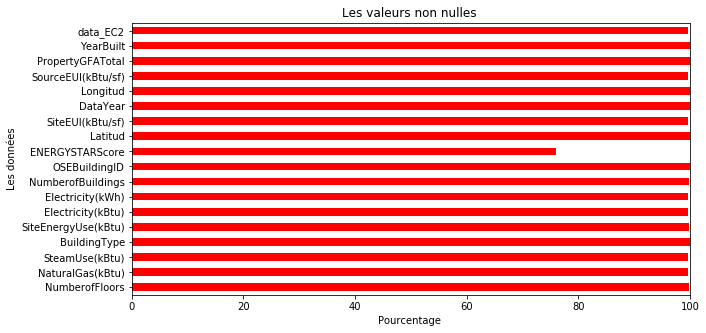

In [ ]:
plt.figure(figsize=(10,5))
(data_1516.notnull().mean(axis=0)*100).plot.barh(color ="red")
plt.xlim(xmax=100)
plt.title("Les valeurs non nulles ")
plt.xlabel("Pourcentage ")
plt.ylabel("Les données")

In [ ]:
data_1516.to_csv("cleaned_1516.csv")


# 2. L'analyse Univariée

On s'interesse tout début à la distribution et on vérifie les outliers des differents composants principaux :

* Electricity
* NaturalGas

In [ ]:
def boxplot_univ (feature,plotColor="#CC9900"):
    sns.set_style("whitegrid")

    plt.figure(figsize=(8,3))

    sns.boxplot(data=data_1516, y=feature)

(0, 4000000)

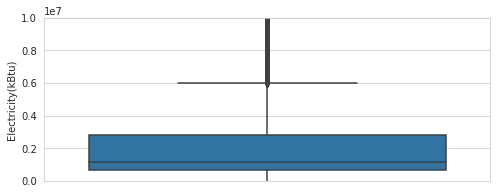

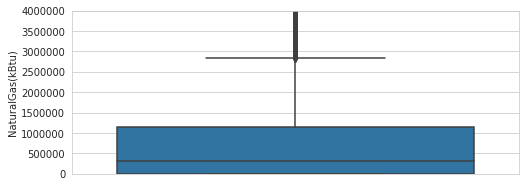

In [ ]:


boxplot_univ("Electricity(kBtu)","#F5F5DC")
plt.ylim (0, 10000000)

boxplot_univ("NaturalGas(kBtu)","#33CC33")
plt.ylim (0, 4000000)




## Distrubition par type des batiments

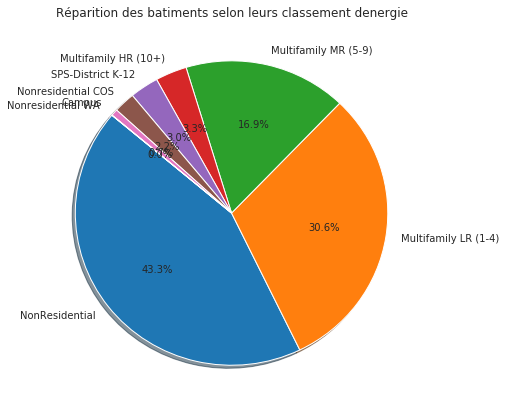

In [ ]:
data_cl = data_1516['BuildingType'].value_counts(normalize=True)
plt.figure(figsize=(7, 7))
savefig("BuildingType.png")

pie(data_cl.values, labels=data_cl.index,
                autopct='%1.1f%%', shadow=True, startangle=140)
title('Réparition des batiments selon leurs classement d''energie')
show()

## Distrubition par ENERGYSTARScore

Text(0.5,1,'Energy Star Score Distribution')

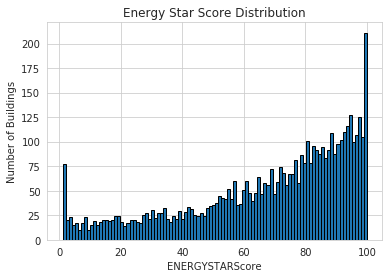

In [ ]:
# Histogram of the Energy Star Score
#plt.style.use('fivethirtyeight')
plt.hist(data_1516['ENERGYSTARScore'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('ENERGYSTARScore'); plt.ylabel('Number of Buildings');
plt.title('Energy Star Score Distribution')

# 3. Analyse multivariée

L'analyse effectué a pour objectif de voir la relation du type des batiments avec les composants principaux cités au dessus

In [ ]:
def boxplot_multiv (feature,plotColor="#CC9900"):

    plt.figure(figsize=(15, 4))
    sns.set_style("whitegrid")

    sns.boxplot(data=data_1516, x="BuildingType",y=feature)


(0, 20000000)

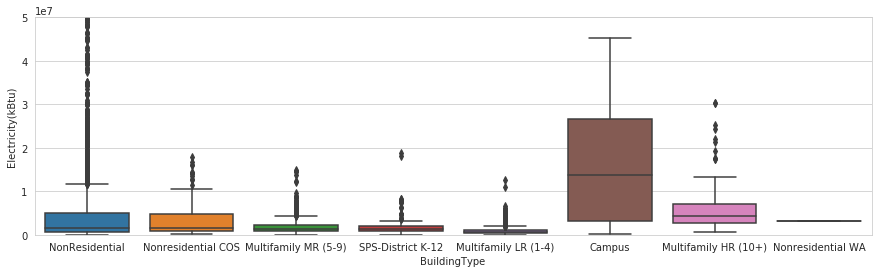

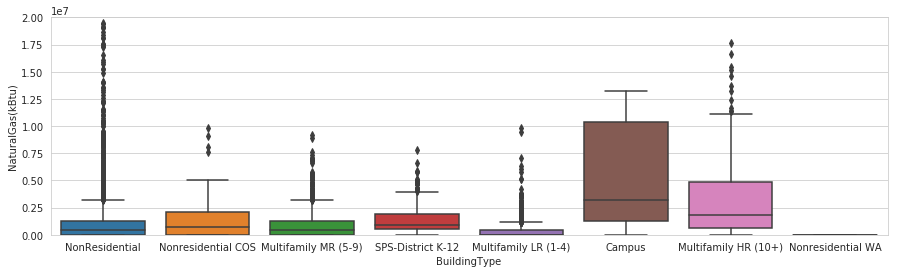

In [ ]:

boxplot_multiv("Electricity(kBtu)","#F5F5DC")
plt.ylim (0, 50000000)

boxplot_multiv("NaturalGas(kBtu)","#33CC33")
plt.ylim (0, 20000000)